In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from ipywidgets import GridBox, Layout, interactive_output
from IPython.display import display

""" 
Model of Love Dynamics 
from chapter 8 and 11 of the book.

Base model of insecure and biased individuals without environmental stress.

"""

' \nModel of Love Dynamics \nfrom chapter 8 and 11 of the book.\n\nBase model of insecure and biased individuals without environmental stress.\n\n'

In [11]:
def love_dynamics(y, t, p):
    """differential equation model

    Args:
        y (array): arrya of initial conditions
        t (array): time intervals
        p (array): parameters to use

    Returns:
        array: array of differential equation results
    """
    x1, x2 = y
    alpha1, alpha2, beta1, beta2, gamma1, gamma2, bA1, bA2, A1, A2, k1, k2, n1, n2, m1, m2, sigma1, sigma2 = p

    RL1 = beta1 * k1 * x2 * np.exp(-(k1 * x2)**n1)
    RL2 = beta2 * k2 * x1 * np.exp(-(k2 * x1)**n2)

    BA1 = x1**(2*m1) / (x1**(2*m1) + sigma1**(2*m1))
    BA2 = x2**(2*m2) / (x2**(2*m2) + sigma2**(2*m2))

    dx1dt = -alpha1 * x1 + RL1 + (1 + bA1 * BA1) * gamma1 * A1
    dx2dt = -alpha2 * x2 + RL2 + (1 + bA2 * BA2) * gamma2 * A2

    return [dx1dt, dx2dt]

In [12]:
initial_conditions = [1, 1.5]
t = np.linspace(0, 50, 1000)

slider_style = {'description_width': 'initial'} 
slider_layout = Layout(width='auto')

In [13]:
def update_plot(alpha1, alpha2, beta1, beta2, gamma1, gamma2, bA1, bA2, A1, A2, k1, k2, n1, n2, m1, m2, sigma1, sigma2):
    """draw and update the plot

    Args:
        alpha1 (float): Forgetting coefficient 1 (decay rate of love of individual 1 in absence of partner)
        alpha2 (float): Forgetting coefficient 2
        beta1 (float): Reactiveness to love of 2 on 1 (influence of the partner's love on an individual's feelings)
        beta2 (float): Reactiveness to love of 1 on 2
        gamma1 (float): Reactiveness to appeal of 2 on 1 (influence of the partner's appeal on an individual's feelings)
        gamma2 (float): Reactiveness to appeal of 1 on 2
        bA1 (float): Bias coefficient of individual 1 (how much individual 1 is biased towards their partner, > 0 for synergic, 0 for unbiased, < 0 for platonic)
        bA2 (float): Bias coefficient of individual 2
        A1 (float): Appeal of individual 1 (how much individual 1 is appealing to their partner)
        A2 (float): Appeal of individual 2
        k1 (float): Insecurity of individual 1 (Peak of reaction function of 1 on 2, high k1 means they are annoyed by their partner's love earlier)
        k2 (float): Insecurity of individual 2
        n1 (float): Shape of reaction function of 1 on 2 (nonlinearity of reaction function of 1 on 2, sensitivity of the individuals' feelings to changes in their partner's feelings)
        n2 (float): Shape of reaction function of 2 on 1
        m1 (float): Shape of bias function of 1 (nonlinearity of bias function of 1, sensitivity of how the own feelings influence their perception of their partner's appeal)
        m2 (float): Shape of bias function of 2
        sigma1 (float): Saddle quantity of 1 (Trace of Jabobian of 1, threshold of when own feelings influence their perception of their partner's appeal. > 0 for stable, < 0 for unstable)
        sigma2 (float): Saddle quantity of 2
    """
    params = [alpha1, alpha2, beta1, beta2, gamma1, gamma2, bA1, bA2, A1, A2, k1, k2, n1, n2, m1, m2, sigma1, sigma2]
    solution = odeint(love_dynamics, initial_conditions, t, args=(params,))
    
    plt.figure(figsize=(16, 5))

    # Time series
    plt.subplot(1, 2, 1)
    plt.plot(t, solution[:, 0], label='Romeo', color='tab:blue')
    plt.plot(t, solution[:, 1], label='Juliet', color='tab:pink')
    plt.xlabel('Time')
    plt.ylabel('Feelings')
    plt.title('Dynamics of Romantic Relationship')
    plt.legend()
    plt.grid(True)

    # Phase diagram
    plt.subplot(1, 2, 2)
    plt.plot(solution[:, 0], solution[:, 1])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Phase Diagram')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [14]:
# Parameters
alpha1_slider = widgets.FloatSlider(value=0.36, min=0, max=1, step=0.01, description='Forgetting Coef. Romeo (alpha1)', style=slider_style, layout=slider_layout)
alpha2_slider = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.01, description='Forgetting Coef. Juliet (alpha2)', style=slider_style, layout=slider_layout)
beta1_slider = widgets.FloatSlider(value=0.75, min=0, max=10, step=0.01, description='Reactiveness to Love Juliet on Romeo (beta1)', style=slider_style, layout=slider_layout)
beta2_slider = widgets.FloatSlider(value=10.66, min=0, max=20, step=0.01, description='Reactiveness to Love Romeo on Juliet (beta2)', style=slider_style, layout=slider_layout)
gamma1_slider = widgets.FloatSlider(value=1, min=0, max=5, step=0.1, description='Reactiveness to Appeal Juliet on Romeo (gamma1)', style=slider_style, layout=slider_layout)
gamma2_slider = widgets.FloatSlider(value=1, min=0, max=5, step=0.1, description='Reactiveness to Appeal Romeo on Juliet (gamma2)', style=slider_style, layout=slider_layout)
bA1_slider = widgets.FloatSlider(value=2.9, min=0, max=5, step=0.1, description='Bias Coef. of Romeo (bA1)', style=slider_style, layout=slider_layout)
bA2_slider = widgets.FloatSlider(value=1, min=0, max=5, step=0.1, description='Bias Coef. of  Juliet (bA2)', style=slider_style, layout=slider_layout)
A1_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Appeal of Romeo (A1)', style=slider_style, layout=slider_layout)
A2_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Appeal of Juliet (A2)', style=slider_style, layout=slider_layout)
k1_slider = widgets.FloatSlider(value=0.08, min=0, max=2, step=0.01, description='Insecurity of Romeo (k1)', style=slider_style, layout=slider_layout)
k2_slider = widgets.FloatSlider(value=1.5, min=0, max=2, step=0.01, description='Insecurity of Juliet (k2)', style=slider_style, layout=slider_layout)
n1_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='Shape of Reaction Function Romeo on Juliet (n1)', style=slider_style, layout=slider_layout)
n2_slider = widgets.FloatSlider(value=4, min=0, max=10, step=0.1, description='Shape of Reaction Function Juliet on Romeo (n2)', style=slider_style, layout=slider_layout)
m1_slider = widgets.FloatSlider(value=4, min=0, max=10, step=0.1, description='Shape of Bias Function Romeo (m1)', style=slider_style, layout=slider_layout)
m2_slider = widgets.FloatSlider(value=4, min=0, max=10, step=0.1, description='Shape of Bias Function Juliet (m2)', style=slider_style, layout=slider_layout)
sigma1_slider = widgets.FloatSlider(value=1, min=-1, max=1, step=0.1, description='Saddle Quantity of Romeo (sigma1)', style=slider_style, layout=slider_layout)
sigma2_slider = widgets.FloatSlider(value=1, min=-1, max=1, step=0.1, description='Saddle Quantity of Juliet (sigma2)', style=slider_style, layout=slider_layout)

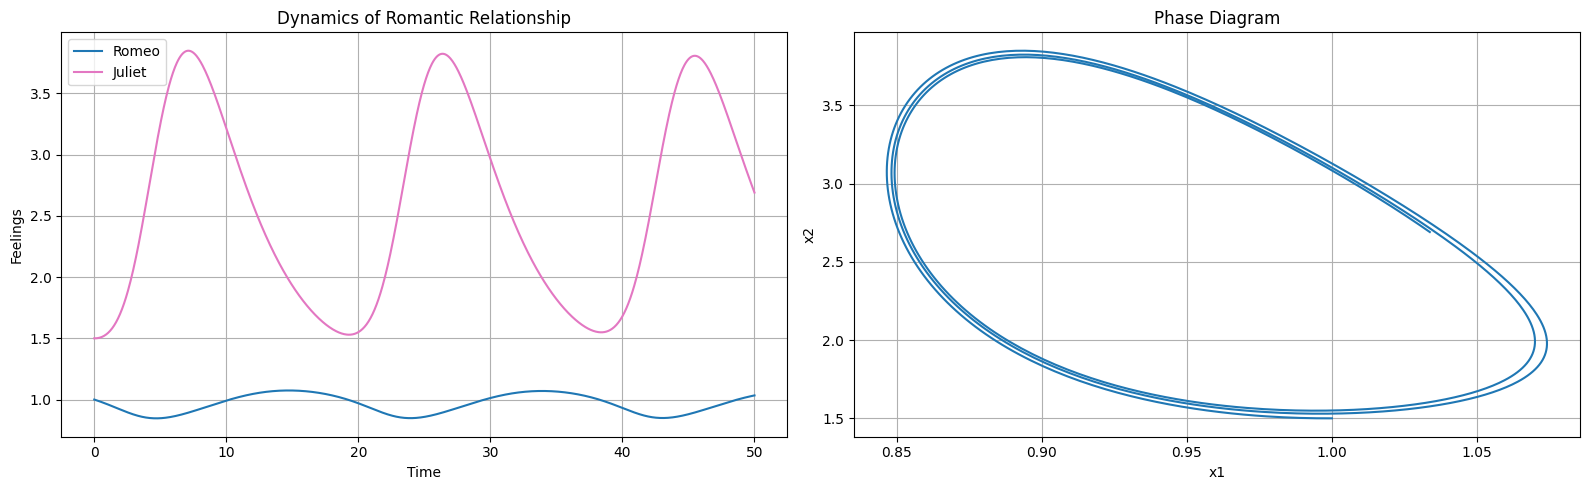

In [15]:
sliders = [
    alpha1_slider, alpha2_slider, beta1_slider, beta2_slider, gamma1_slider, gamma2_slider,
    bA1_slider, bA2_slider, A1_slider, A2_slider, k1_slider, k2_slider, n1_slider, n2_slider,
    m1_slider, m2_slider, sigma1_slider, sigma2_slider
]

grid = GridBox(sliders, layout=Layout(
    width='100%',
    grid_template_columns='repeat(3, 32%)',  
    grid_gap='20px 20px'
))

interactive_plot = interactive_output(update_plot, {
    'alpha1': alpha1_slider, 'alpha2': alpha2_slider, 'beta1': beta1_slider, 'beta2': beta2_slider,
    'gamma1': gamma1_slider, 'gamma2': gamma2_slider, 'bA1': bA1_slider, 'bA2': bA2_slider,
    'A1': A1_slider, 'A2': A2_slider, 'k1': k1_slider, 'k2': k2_slider, 'n1': n1_slider, 
    'n2': n2_slider, 'm1': m1_slider, 'm2': m2_slider, 'sigma1': sigma1_slider, 'sigma2': sigma2_slider
})

widgets.VBox([grid, interactive_plot])
